# HOMEWORK 1: DATA MINING 
Name: Ellis  

Student ID:111065426

GitHub ID: aeotqf



---

## PART 1: Take Home Exercises from DM2022-Lab1-Master


In [416]:
# importing some libraries
import numpy as np
import pandas as pd
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import plotly as py
import math
%matplotlib inline

# prepare the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [417]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [418]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

---

### Exercise 2: 

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [419]:
# converting the data to pandas dataframe and exploring the data
data_df = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [420]:
#show first five records of the text column
data_df.head(5) 

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...


In [421]:
#show the name of the columns of the df
data_df.columns 

Index(['text'], dtype='object')

In [422]:
# adding some columns to the df
data_df['category']=twenty_train.target
data_df['category_name'] = data_df.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [423]:
data_df.head(5)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [424]:
data_df.columns

Index(['text', 'category', 'category_name'], dtype='object')

In [425]:
# some queries to explore the data
data_df[0:10]['text']

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [426]:
data_df.loc[0:10,'text'] #loc[#records, name of index]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [427]:
data_df.iloc[0:10,0] #iloc[#records, index]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [428]:
# some queries to explore the data
data_df.loc[0:10,['text','category']]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2


In [429]:
# Creating a new dataframe
df2 = pd.DataFrame({'ID':['12','13','14','15'],
                   'Name':['Chen','Wang','Lin','Liu'],
                   'S':['F','M','F','M'],
                   'Dept':['CS','ISA','CS','EE'],
                   'JobType':['Faculty','Technician','Secretary','Faculty']}) 
df2

,ID,Name,S,Dept,JobType
0,12,Chen,F,CS,Faculty
1,13,Wang,M,ISA,Technician
2,14,Lin,F,CS,Secretary
3,15,Liu,M,EE,Faculty


In [430]:
# select from the first to third record only in the Department Attribute
df2.loc[0:2, 'Dept'] 

0     CS
1    ISA
2     CS
Name: Dept, dtype: object

In [431]:
# select from the first to third record from the department to the last attribute
df2.loc[0:2, 'Dept':] 

,Dept,JobType
0,CS,Faculty
1,ISA,Technician
2,CS,Secretary


In [432]:
# filtering with boolean conditions, similar to the WHERE in the SQL
df2[df2['JobType'] == 'Faculty']

,ID,Name,S,Dept,JobType
0,12,Chen,F,CS,Faculty
3,15,Liu,M,EE,Faculty


In [433]:
# the same as the before line can be acomplished with the query method
df2.query('JobType == "Faculty"')

,ID,Name,S,Dept,JobType
0,12,Chen,F,CS,Faculty
3,15,Liu,M,EE,Faculty


In [434]:
df2[df2['ID'] <= '14'] #filtering for all the records with ID < than 14

,ID,Name,S,Dept,JobType
0,12,Chen,F,CS,Faculty
1,13,Wang,M,ISA,Technician
2,14,Lin,F,CS,Secretary


In [435]:
# filtering for the records that 
criterion = df2['Name'].map(lambda t: t.startswith('L')) 
df2[criterion]

,ID,Name,S,Dept,JobType
2,14,Lin,F,CS,Secretary
3,15,Liu,M,EE,Faculty


In [436]:
# filtering for the records that the Name starts with L and the Job is Faculty
df2[criterion & (df2['JobType'] == 'Faculty')]  

,ID,Name,S,Dept,JobType
3,15,Liu,M,EE,Faculty


In [437]:
# another dataframe
df3 = pd.DataFrame({'DNo':['CS','ISA','EE'],
                   'Location':['Delta 526','Delta 522', 'Delta 504']})
df3

,DNo,Location
0,CS,Delta 526
1,ISA,Delta 522
2,EE,Delta 504


In [438]:
# concatenating df2 and df3 in the columns
df_concat=pd.concat([df2,df3],axis=1)
df_concat

,ID,Name,S,Dept,JobType,DNo,Location
0,12,Chen,F,CS,Faculty,CS,Delta 526
1,13,Wang,M,ISA,Technician,ISA,Delta 522
2,14,Lin,F,CS,Secretary,EE,Delta 504
3,15,Liu,M,EE,Faculty,NaN,NaN


In [439]:
# however for this two dataframes (df2,df3) is better to join them


---

### Exercise 5: 

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡  : why .isnull() didn't work?

In [440]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [441]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [442]:
pd.isna(NA_df['missing_example'][0])
# np.nan is a NaN value

True

In [443]:
pd.isna(NA_df['missing_example'][1])
# there is not value in that index

True

In [444]:
pd.isna(NA_df['missing_example'][2])
# because 'NaN' is a string

False

In [445]:
pd.isna(NA_df['missing_example'][3])
# because 'None' is a string

False

In [446]:
pd.isna(NA_df['missing_example'][4])
# because None represents a missing value

True

In [447]:
pd.isna(NA_df['missing_example'][5])
# because '' represents a space and space is not a mising value

False

* As a summary then **isnull()** didn't work because the format lacks consistency in how to represents the missing value in the data. So I think that the function worked correctly and the mistake is in the representation of the data

---

### Exercise 6: 
Notice any changes to the dataframe? What are they? Report every change you noticed as compared to the previous state of the dataframe. Feel free to query and look more closely at the dataframe for these changes.

In [448]:
# sample data
data_df_sample=data_df.sample(n=1000)
data_df_sample[0:5]

,text,category,category_name
2139,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism
109,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
169,From: cobb@alexia.lis.uiuc.edu (Mike Cobb) Sub...,0,alt.atheism
573,From: 9051467f@levels.unisa.edu.au (The Desert...,0,alt.atheism
1867,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism


In [449]:
# number of records per category in the sample
count_sample = data_df_sample["category"].value_counts()
count_sample


1    268
2    265
3    257
0    210
Name: category, dtype: int64

In [450]:
# summary information of the sample
print(count_sample.mean()) # median records per category
print(count_sample.min()) # category with the least records
print(count_sample.max()) # category with the most records
print(count_sample.std()) # standar deviation


250.0
210
268
27.067816067549053


In [451]:
# original data
data_df[0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [452]:
# number of records per category in the original data
count = data_df["category"].value_counts()
count

3    599
2    594
1    584
0    480
Name: category, dtype: int64

In [453]:
# summary information of the original
print(count.mean()) # median records per category
print(count.min()) # category with the least records
print(count.max()) # category with the most records
print(count.std()) # standar deviation

564.25
480
599
56.511798178197566


* If we compare both dataframes in the next two cells, the original data with the sample data. The records are not in order in the sample data. This because the sample needs to be random to diminish the bias and for the data to be representative of the population as a whole in order for the sample to have statistical significance. 
* The amount of records by category in the sample is different from the amount in the original data e.g in the original there is more records in the category number 3 whereas in the sample the category number 2 is the one with more** 

---

### Exercise 8 : 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an exercise.

In [454]:
count.index

Int64Index([3, 2, 1, 0], dtype='int64')

In [455]:
data_df["category_name"].value_counts().index

Index(['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'], dtype='object')

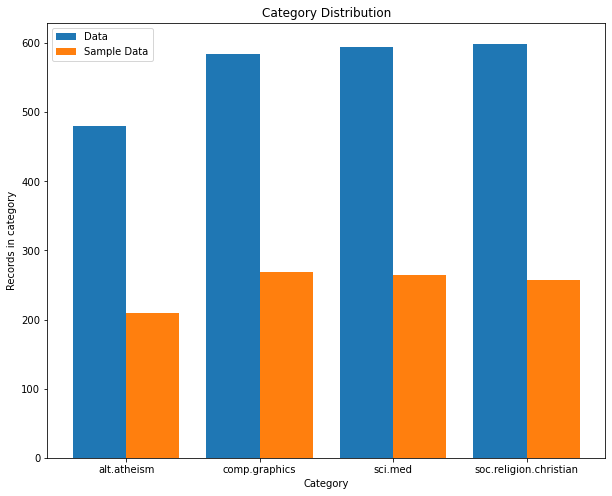

In [456]:
# now plotting both bar charts
#using the documentation https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
width = 0.4
plt.figure(figsize=(10,8))

# Original data bar plot (see count above from exercise 5)
plt.bar(count.index - width/2, count, width)

# Sample data bar plot (see count_sample above from exercise 5)
plt.bar(count_sample.index + width/2, count_sample, width)

# this is to put the names of the indexes in category_name as labels of both bars
plt.xticks(count.index, data_df["category_name"].value_counts().index)

# just more customization of the plot
plt.xlabel("Category")
plt.ylabel("Records in category")
plt.title("Category Distribution")
plt.legend(['Data','Sample Data'])

plt.show()

---

### Exercise 10:
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [457]:
#feature subset function
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data_df.text) #learn the vocabulary and return document-term matrix

# I thin they want the opposite, from the document matix get the vocab

In [458]:
# convert from sparse array to normal array
data_array = data_counts[0:5, 0:100].toarray()
data_array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [459]:
# the 1 at the beginning of the fifth record represents the 00 term then the 1 in the 38 record,
# represents the 
count_vect.get_feature_names_out()[37]

'01'

In [460]:

analyze = count_vect.build_analyzer()
data_counts[37]
#analyze(data_df.text[37])

<1x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 224 stored elements in Compressed Sparse Row format>

In [461]:
data_df.text[37] # is this what they want ?

"From: bcash@crchh410.NoSubdomain.NoDomain (Brian Cash) Subject: Re: A visit from the Jehovah's Witnesses Nntp-Posting-Host: crchh410 Organization: BNR, Inc. Lines: 51  In article <1993Apr2.115300.803@batman.bmd.trw.com>, jbrown@batman.bmd.trw.com writes: |> In article <C4twso.8M2@HQ.Ileaf.COM>, mukesh@HQ.Ileaf.COM (Mukesh Prasad) writes: |> > In article <1993Apr1.142854.794@batman.bmd.trw.com> jbrown@batman.bmd.trw.com writes: |> >> In article <1p8v1aINN9e9@matt.ksu.ksu.edu>, strat@matt.ksu.ksu.edu (Steve Davis) writes: |> >> > bskendig@netcom.com (Brian Kendig) writes: |> >> >  |> >> >>- The Earth is evil because Satan rules over it. |> >> >  |> >> > This is a new one to me.  I guess it's been a while since a Witness |> >> > bothered with me.  Are they implying that Satan is omniscient?  You |> >> > might try tricking them into saying that Satan is 'all-knowing' and |> >> > then use that statement to show them how their beliefs are |> >> > self-contradictary.   |> >>  |> >> No, Satan

---

### Exercise 11:
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [462]:
# Trying to plot the entire term-document matrix,
# it takes a lot of time

# getting the features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data_df.index)[0:50]]
plot_z = data_counts[0:50, 0:50].toarray()
#plot_z

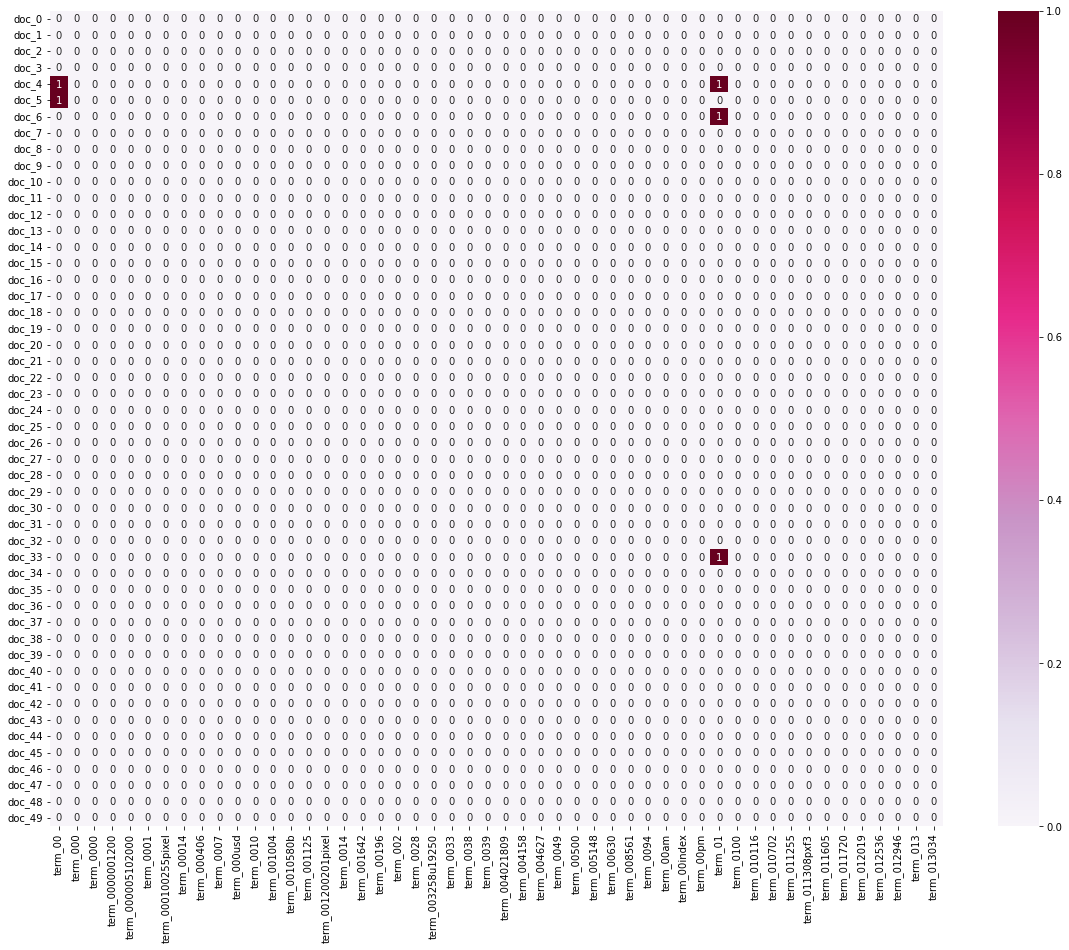

In [463]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20,15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### Exercise 12:
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [464]:
from sklearn.decomposition import PCA
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())

In [465]:
data_reduced.shape #dimension to three

(2257, 3)

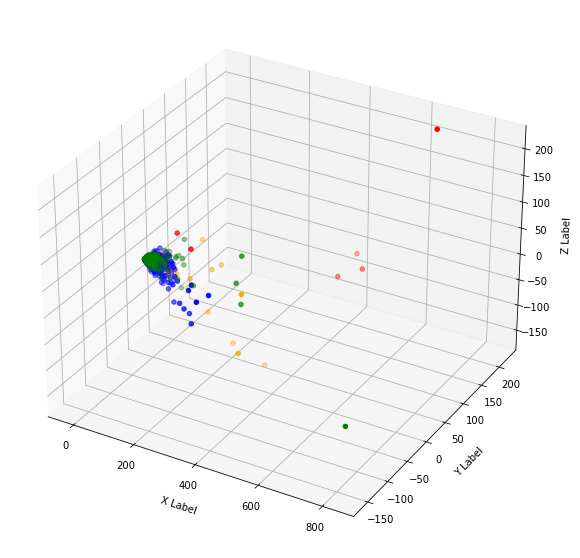

ax.azim -60
ax.elev 30


In [466]:
# first test n_components = 3
col = ['green', 'blue', 'red', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data_df['category_name'] == category].T[0]
    ys = data_reduced[data_df['category_name'] == category].T[1]
    zs = data_reduced[data_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#ax.view_init(30,-10) #view_init(elev, azim)

plt.show()
print('ax.azim {}'.format(ax.azim)) #to have a reference of the first view
print('ax.elev {}'.format(ax.elev))

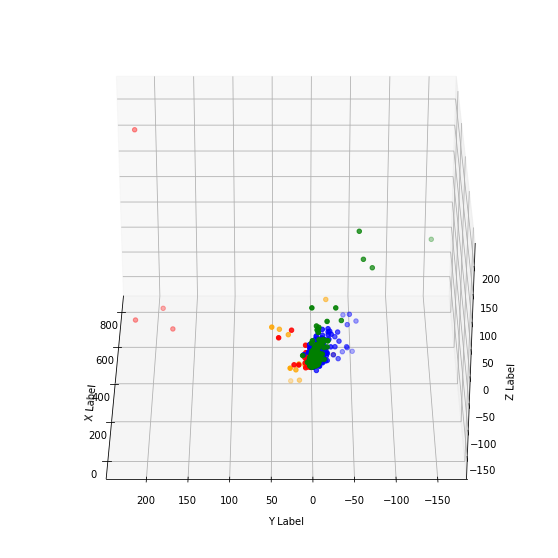

ax.azim -180
ax.elev 30


In [467]:
# first test n_components = 3
col = ['green', 'blue', 'red', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data_df['category_name'] == category].T[0]
    ys = data_reduced[data_df['category_name'] == category].T[1]
    zs = data_reduced[data_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(30,-180) #view_init(elev, azim)

plt.show()
print('ax.azim {}'.format(ax.azim)) #to have a reference of the first view
print('ax.elev {}'.format(ax.elev))

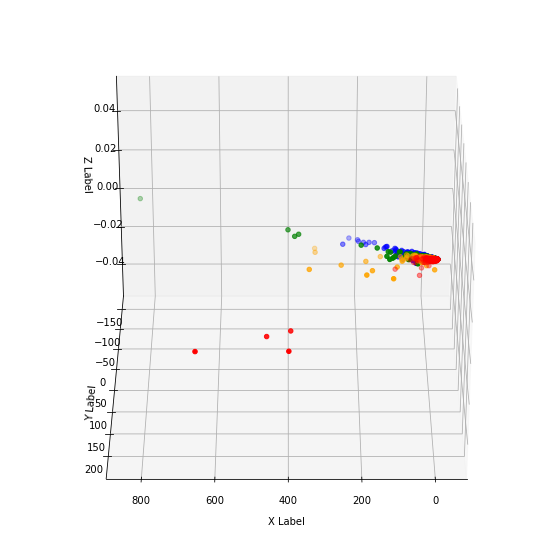

ax.azim -270
ax.elev 30


In [468]:
# first test n_components = 3
col = ['green', 'blue', 'red', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data_df['category_name'] == category].T[0]
    ys = data_reduced[data_df['category_name'] == category].T[1]
    zs = data_reduced[data_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(30,-270) #view_init(elev, azim)

plt.show()
print('ax.azim {}'.format(ax.azim)) #to have a reference of the first view
print('ax.elev {}'.format(ax.elev))

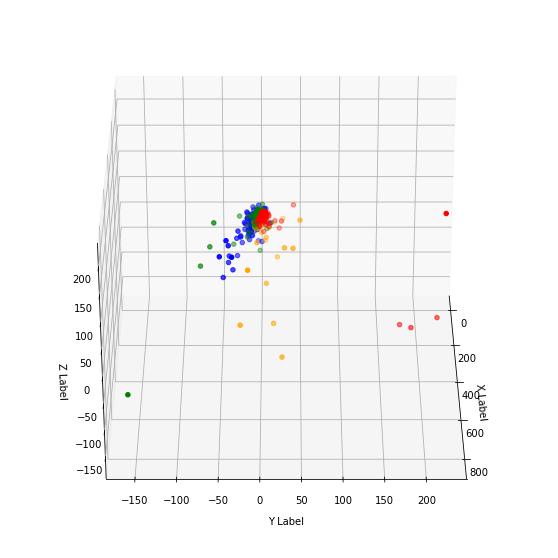

ax.azim -360
ax.elev 30


In [469]:
# first test n_components = 3
col = ['green', 'blue', 'red', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data_df['category_name'] == category].T[0]
    ys = data_reduced[data_df['category_name'] == category].T[1]
    zs = data_reduced[data_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(30,-360) #view_init(elev, azim)

plt.show()
print('ax.azim {}'.format(ax.azim)) #to have a reference of the first view
print('ax.elev {}'.format(ax.elev))

C:\Users\Ellis\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning:

invalid value encountered in sqrt



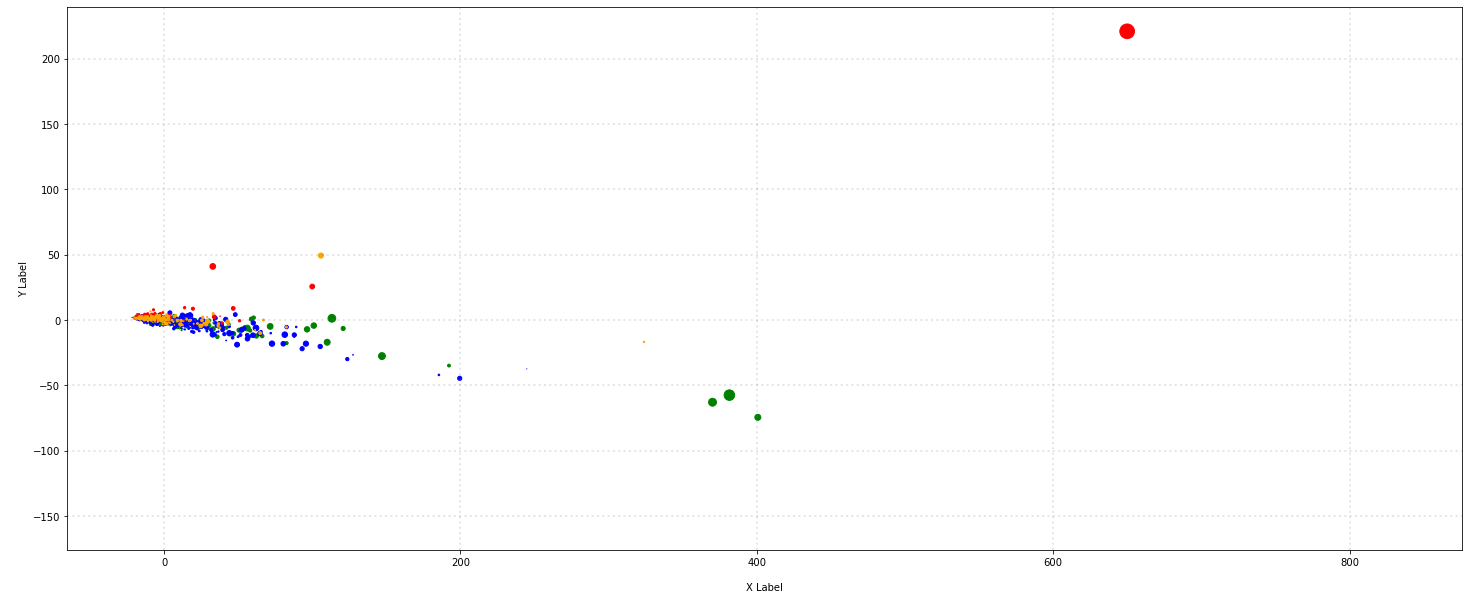

In [470]:
# comparing with original
col = ['green', 'blue', 'red', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data_df['category_name'] == category].T[0]
    ys = data_reduced[data_df['category_name'] == category].T[1]
    zs = data_reduced[data_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
#ax.set_zlabel('\nZ Label')

plt.show()

In the 3D graphs we can observe how the records overlap from different vantage points when changing the angle. e.g: in the original we cant observe the amount of red dots in the cluster, maybe we conlcude that there is not, however when we change the view ther is actually a lot of features corresponding to the red dot in the cluster.

---

### Exercise 13:
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [471]:
#!pip install plotly #install plotly if not installed already

In [472]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [473]:
# preparing the data
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

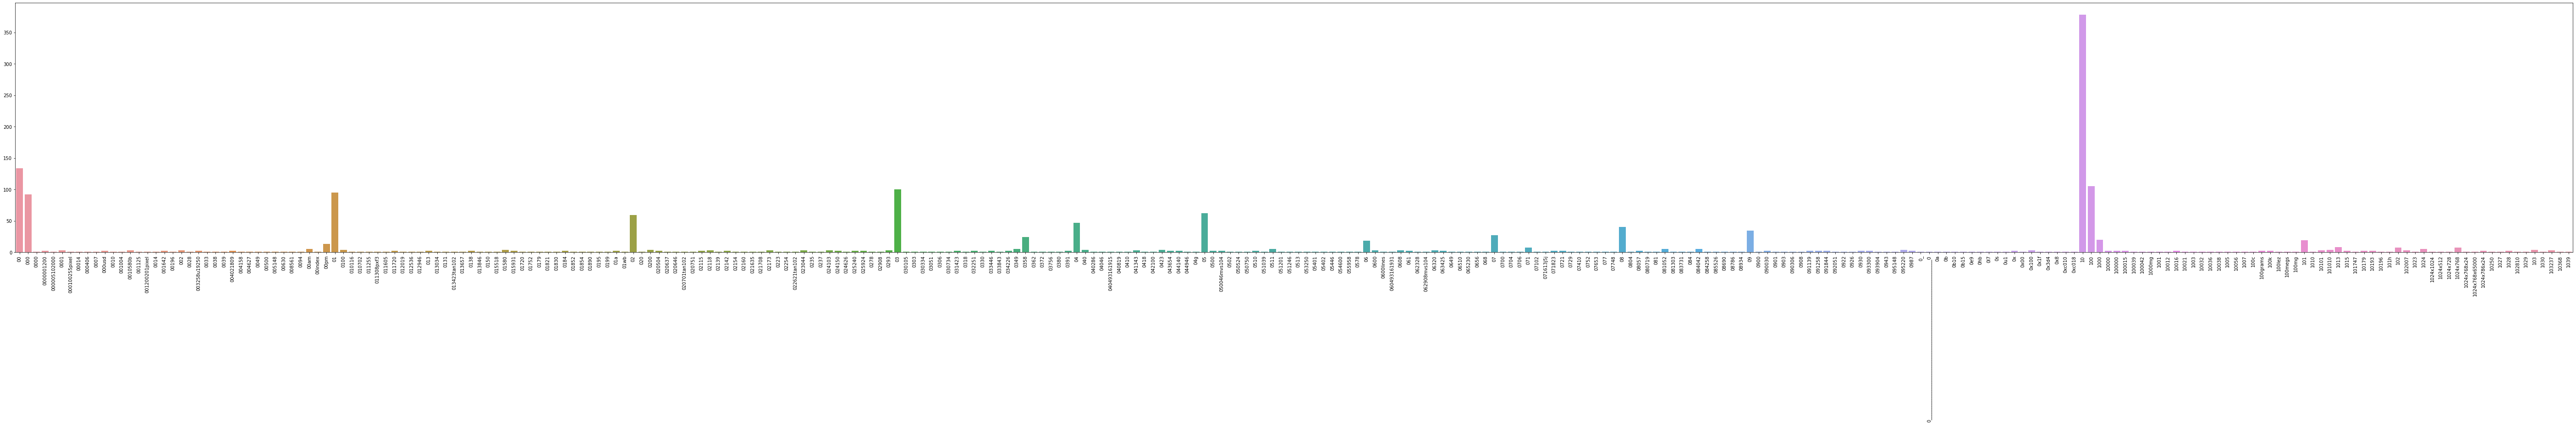

In [474]:
# original plot from the lab
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [475]:
# to make a complex plotly data viz
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [476]:
# simple plotly interactive bar plot with a 100 records
# https://plotly.com/python/bar-charts/
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:100],y=term_frequencies[:100])
fig.show()

---

### Exercise 14:
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

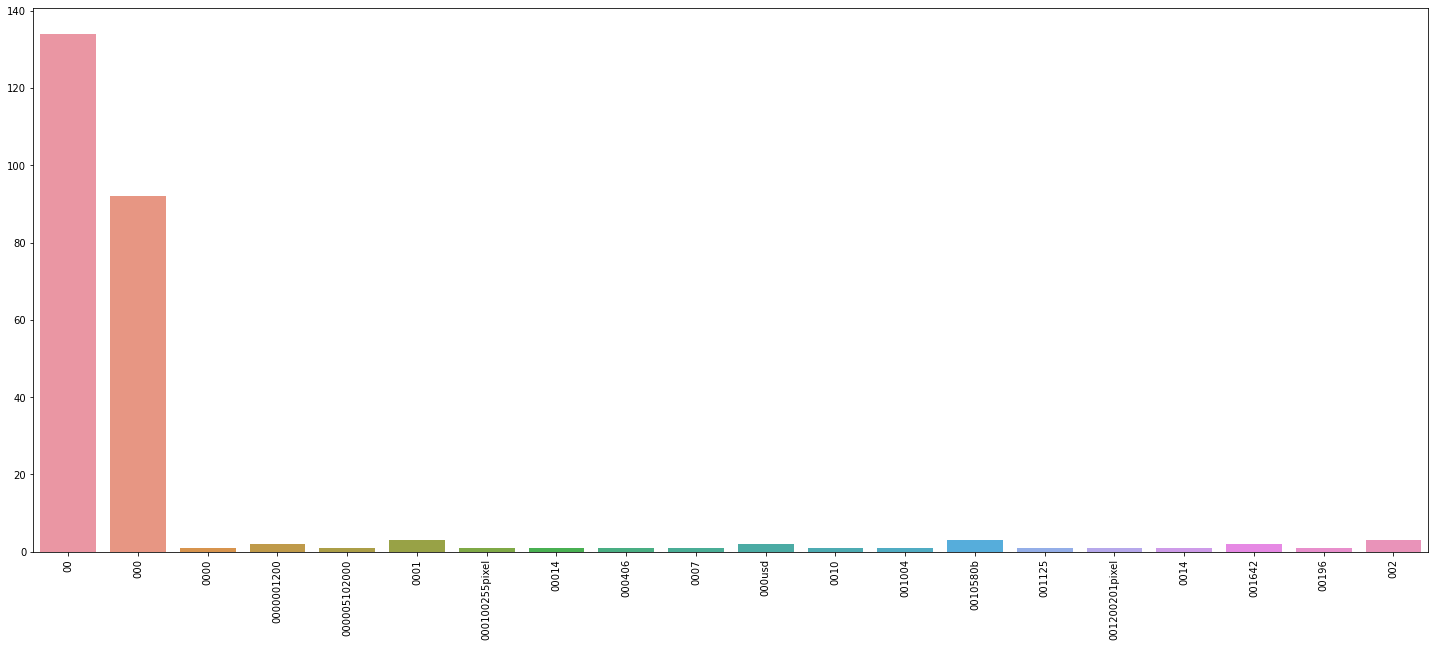

In [477]:
# just using less features from the data
plt.subplots(figsize=(25, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:20], 
            y=term_frequencies[:20])
g.set_xticklabels(count_vect.get_feature_names_out()[:20], rotation = 90);

In [478]:
# from the array we can observe that there is a lot of columns with low values
term_frequencies[0:50]

array([134,  92,   1,   2,   1,   3,   1,   1,   1,   1,   2,   1,   1,
         3,   1,   1,   1,   2,   1,   3,   1,   2,   1,   1,   1,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   5,   1,  13,  95,   4,
         1,   1,   1,   1,   1,   2,   1,   1,   1,   2,   1], dtype=int64)

In [479]:
# some information about the frequencies array, the difference between the min and the max is a lot
print(term_frequencies.min())
print(term_frequencies.max())
print(term_frequencies.std())

1
29825
274.4202136657071


In [480]:
# there is a lot of low values
#https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array
unique, counts = np.unique(term_frequencies, return_counts=True) 
np.asarray((unique, counts)).T

array([[    1, 14606],
       [    2,  5640],
       [    3,  2890],
       ...,
       [17222,     1],
       [17660,     1],
       [29825,     1]], dtype=int64)

In [481]:
# maybe we can make a visualization neglecting low values
term_frequencies2=term_frequencies[term_frequencies>50]
term_frequencies2[0:100]

array([ 134,   92,   95,   59,  100,   62,  378,  105,  215,  236,   82,
        219,  239,  293,  278,  192,  184,  208,   83,  488,   61,  324,
        192,  142,  136,  268,  116,   85,  123,  101,  100,   79,  167,
        104,  101,   88,   78,   76,   54,   60,   55,  210,   86,   69,
         99,   70,  109,   65,   52,  124,  108,  161,   68,  226, 2148,
        248,  137,   56,   67,  303,  183,   95,   57,  130,  129,   71,
         53,   54,   62,  121,   93,   76,   95,  279,   86,   74,  148,
         65,  105,   89,  489,  315,  213,  105,  154,  208,  104,  147,
         52,   90, 2093,   91,   95,   62,   62,  147,   93,  114,  146,
       1090], dtype=int64)

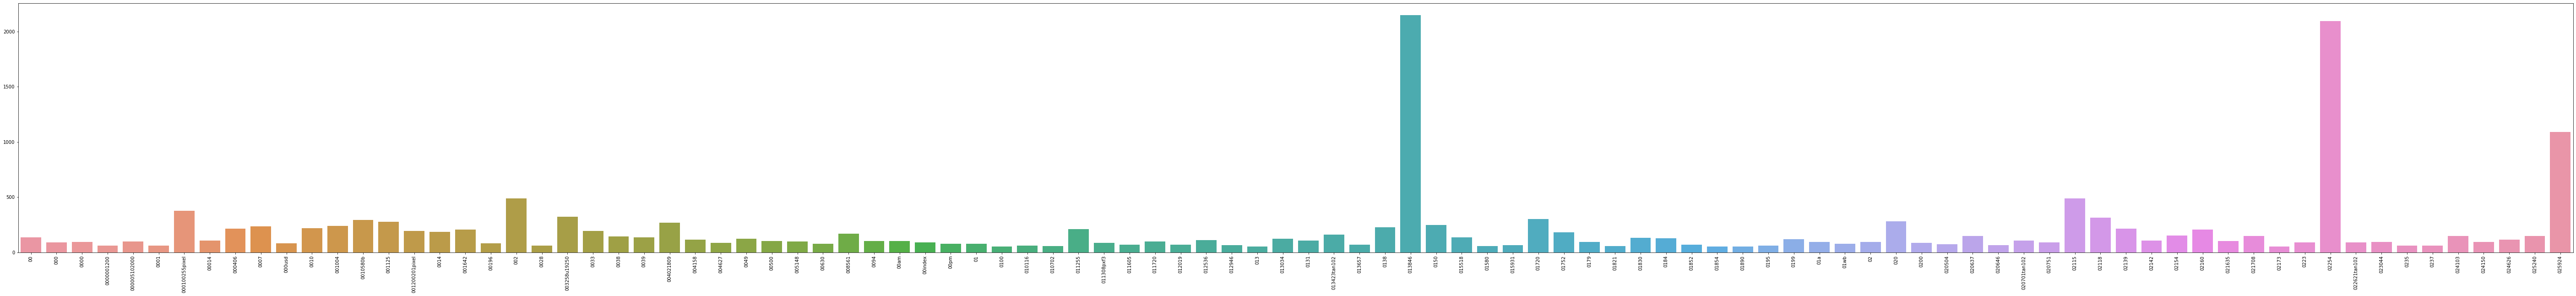

In [482]:
# plot with sns
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies2[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

In [483]:
# plot with plotly
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:100],y=term_frequencies2[:100])
fig.show()

---

### Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [484]:
np.asarray((unique, counts)).T

array([[    1, 14606],
       [    2,  5640],
       [    3,  2890],
       ...,
       [17222,     1],
       [17660,     1],
       [29825,     1]], dtype=int64)

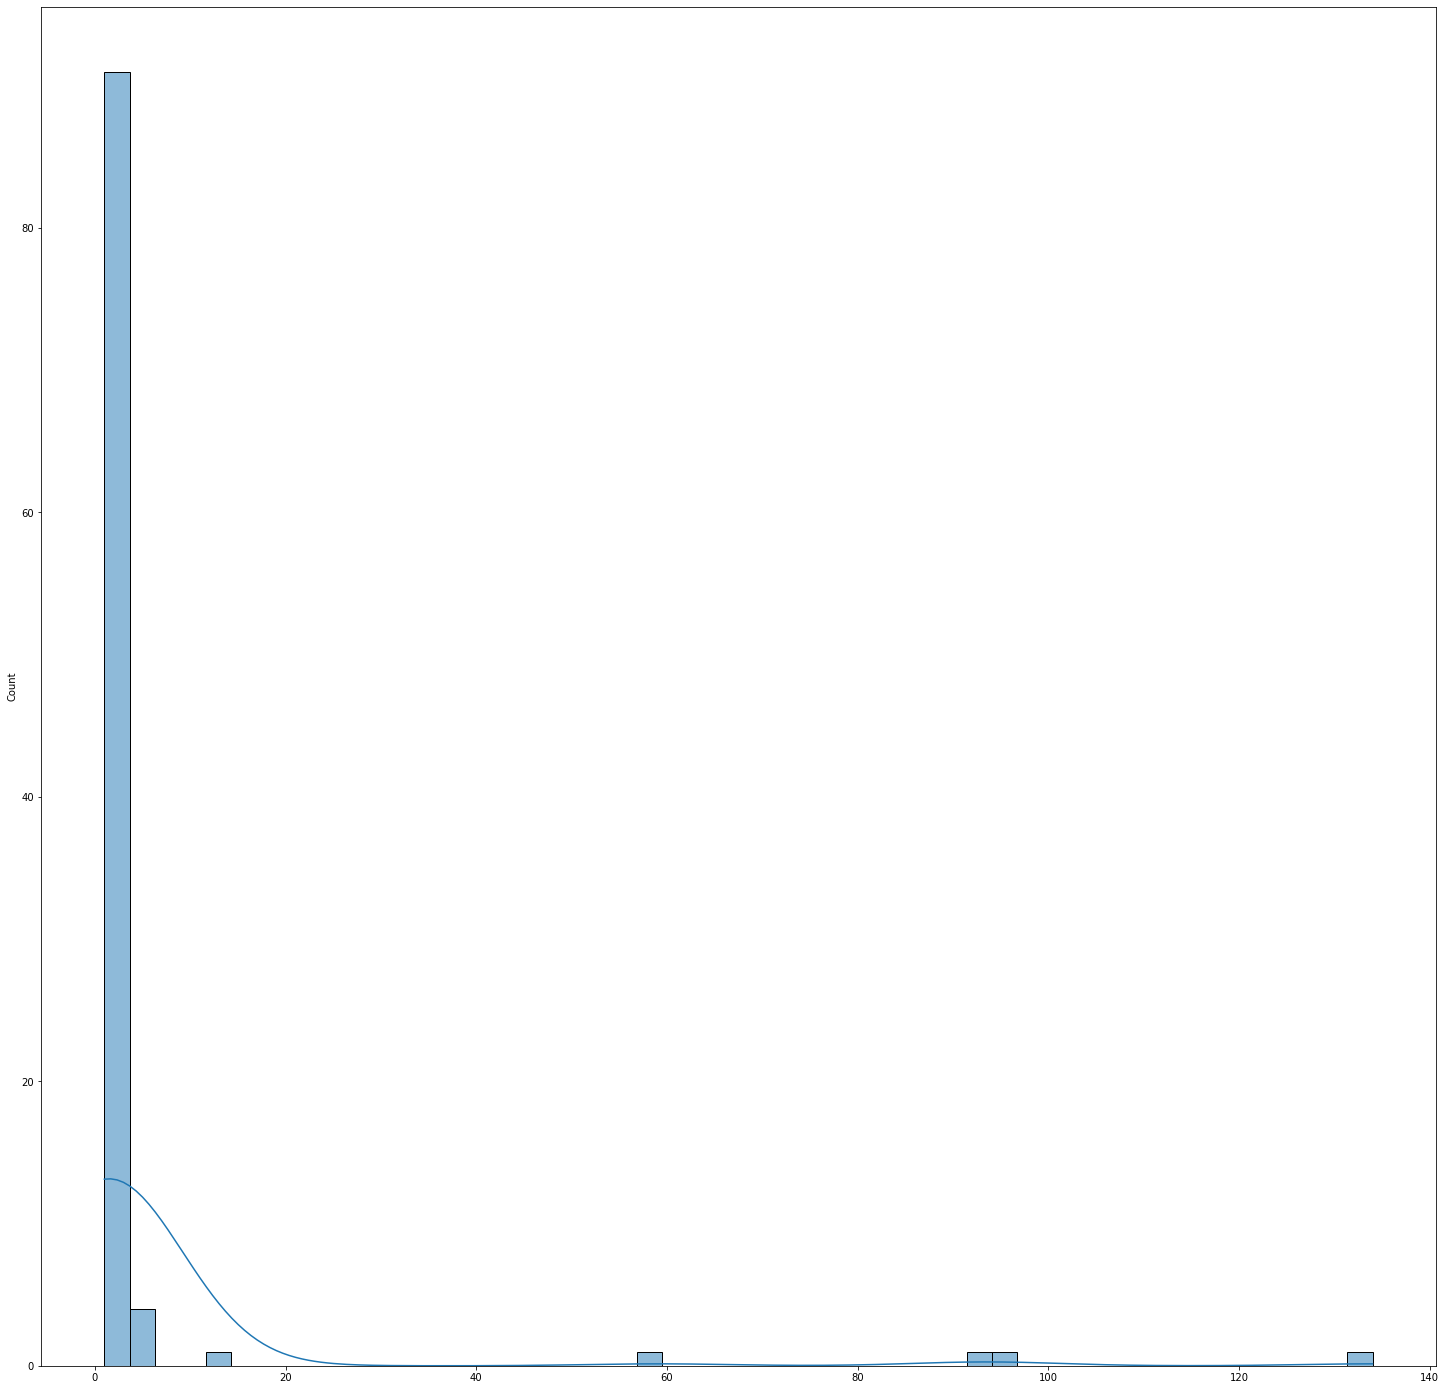

In [485]:
# histogram with the original data
# https://www.python-graph-gallery.com/20-basic-histogram-seaborn
plt.subplots(figsize=(25, 25))
sns.histplot(data=term_frequencies[:100], kde=True, bins=50)
plt.show()

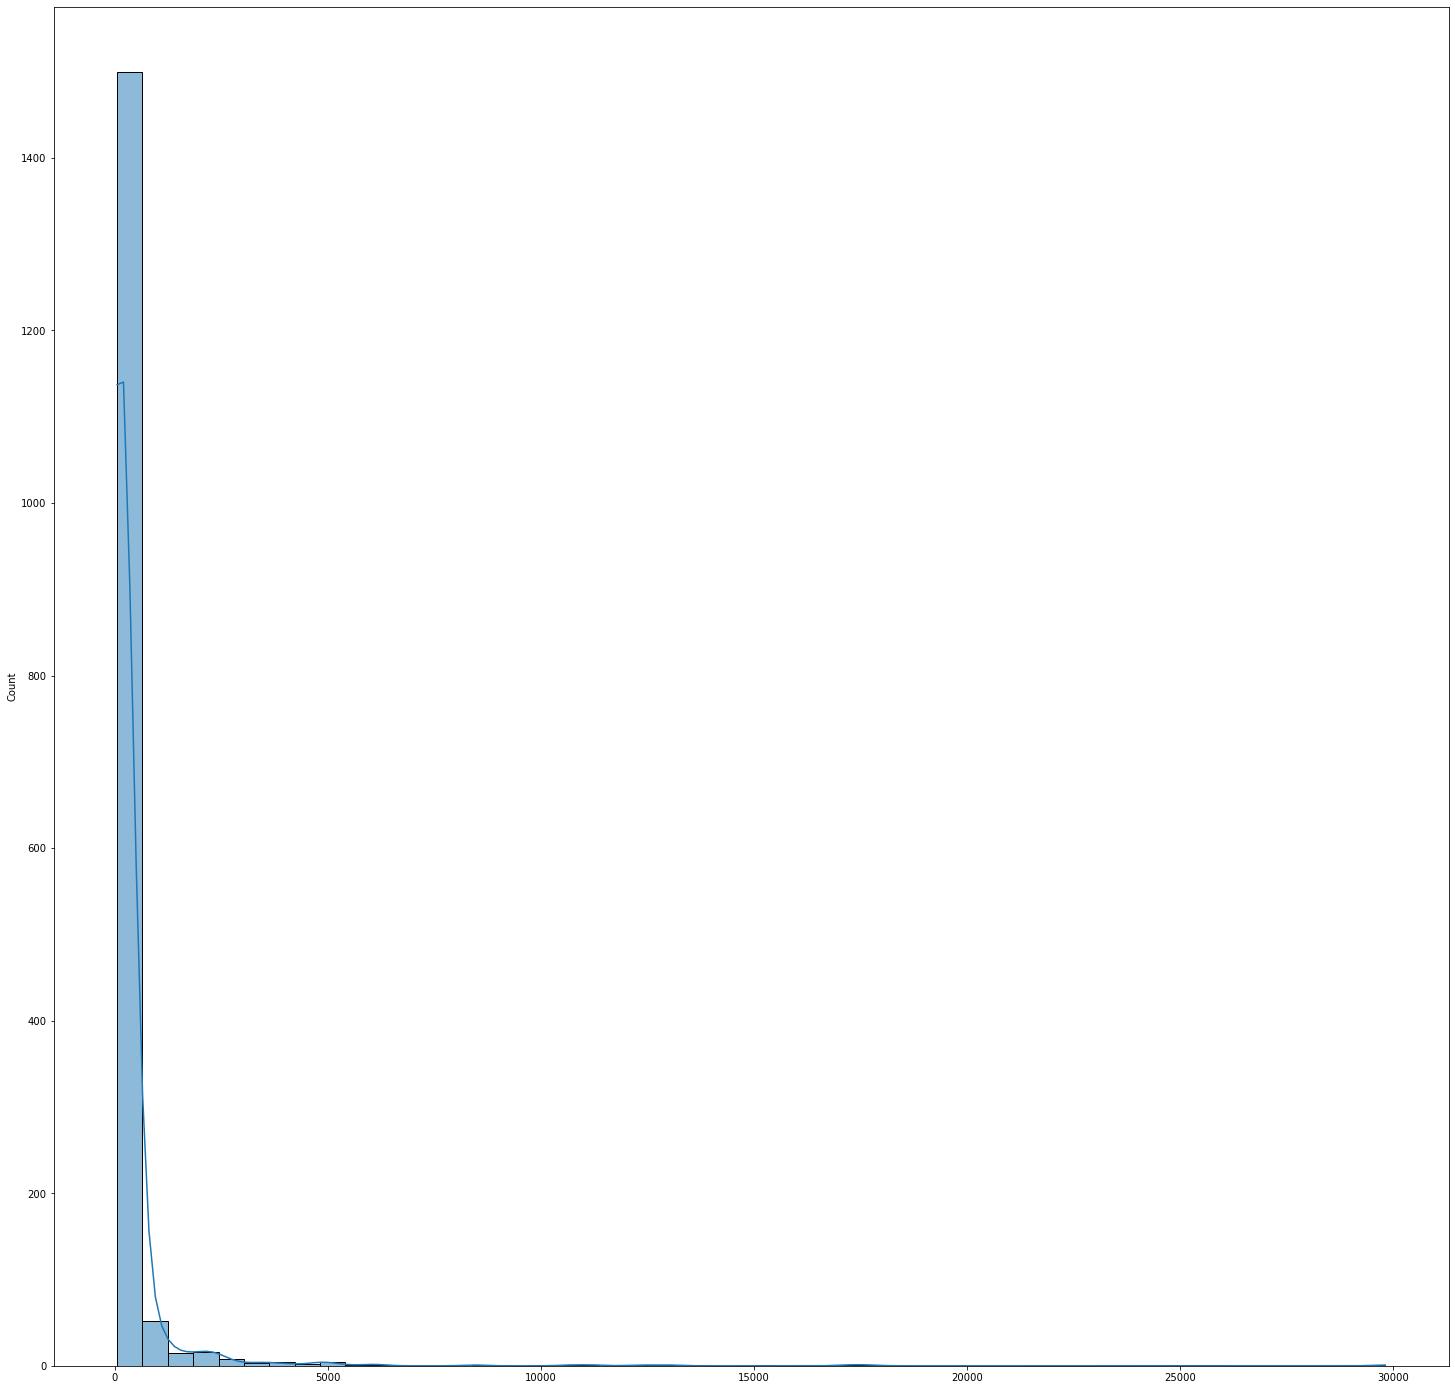

In [486]:
# histogram neglecting low values
plt.subplots(figsize=(25, 25))
sns.histplot(data=term_frequencies2, kde=True, bins=50)
plt.show()

### Exercise 16:
Try to generate the binarization using the `category_name` column instead. Does it work?

In [487]:
# preparing data
mlb = preprocessing.LabelBinarizer()
mlb.fit(data_df.category)

LabelBinarizer()

In [488]:
# making the binarization using the 'category' feature
data_df['bin_category'] = mlb.transform(data_df['category']).tolist()
data_df[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [489]:
# making the binarization using the 'category_name' feature
mlb = preprocessing.LabelBinarizer()
mlb.fit(data_df.category_name)

LabelBinarizer()

In [490]:
data_df['bin_category2'] = mlb.transform(data_df['category_name']).tolist()
data_df[0:9]

,text,category,category_name,bin_category,bin_category2
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


In [491]:
# it works, why ?

------

## PART 2: Sentiment Labelled Sentences Data Set

In [492]:
# obtaining the data already in pandas dataframes
amazon_df = pd.read_csv("new_data/amazon_cells_labelled.txt", sep="\t", header=None, names=["sentence", "score"])
yelp_df=pd.read_table("new_data/yelp_labelled.txt", delimiter = '\t', header=None, names=["sentence", "score"])
imdb_df=pd.read_table("new_data/imdb_labelled.txt", delimiter = '\t', header=None, names=["sentence", "score"])

In [493]:
# 1) exploring the data

In [494]:
amazon_df.head(3)

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [495]:
yelp_df.head(3)

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [496]:
imdb_df.head(3)

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


In [497]:
# 1.1) Because they are dataframes we can query information 

In [498]:
# like this
for i in imdb_df["sentence"][:2]:
    print(i)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  


In [499]:
# or this
amazon_df[:3][["sentence","score"]]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [500]:
# and this
yelp_df.iloc[:5,1]

0    1
1    0
2    0
3    1
4    1
Name: score, dtype: int64

In [501]:
# and this
imdb_df[imdb_df['score']==1].iloc[:15,1]

4     1
7     1
9     1
10    1
11    1
12    1
13    1
14    1
16    1
17    1
18    1
20    1
21    1
22    1
23    1
Name: score, dtype: int64

In [502]:
# 2) Cleaning the data

In [503]:
# 2.1) Looking for missing values

In [504]:
print("missing values in amazon data:\n",amazon_df.isnull().value_counts(),"\n")
print("missing values in imdb data:\n",imdb_df.isnull().value_counts(),"\n")
print("missing values in yelp data:\n",yelp_df.isnull().value_counts(),"\n")


missing values in amazon data:
 sentence  score
False     False    1000
dtype: int64 

missing values in imdb data:
 sentence  score
False     False    748
dtype: int64 

missing values in yelp data:
 sentence  score
False     False    1000
dtype: int64 



In [505]:
# using the helpers functions
amazon_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [506]:
# using the helpers functions
yelp_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [507]:
# using the helpers functions
imdb_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [508]:
# 2.2) Looking for duplicates values

In [509]:
print("the amount of duplicated values in the amazon dataset:",sum(amazon_df.duplicated()))
print("the amount of duplicated values in the yelp dataset:",sum(yelp_df.duplicated()))
print("the amount of duplicated values in the imdb dataset:",sum(imdb_df.duplicated()))

the amount of duplicated values in the amazon dataset: 10
the amount of duplicated values in the yelp dataset: 4
the amount of duplicated values in the imdb dataset: 3


In [510]:
# dropping the duplicated values of the datasets
amazon_df.drop_duplicates(keep=False, inplace=True)
yelp_df.drop_duplicates(keep=False, inplace=True)
imdb_df.drop_duplicates(keep=False, inplace=True)

In [511]:
print("the amount of duplicated values in the amazon dataset:",sum(amazon_df.duplicated()))
print("the amount of duplicated values in the yelp dataset:",sum(yelp_df.duplicated()))
print("the amount of duplicated values in the imdb dataset:",sum(imdb_df.duplicated()))

the amount of duplicated values in the amazon dataset: 0
the amount of duplicated values in the yelp dataset: 0
the amount of duplicated values in the imdb dataset: 0


In [512]:
# 3) Preprocessing

In [513]:
# 3.1) Sampling

In [514]:
# Creating samples of the datasets
print(len(amazon_df))
print(len(yelp_df))
print(len(imdb_df))

980
992
742


In [515]:
amazon_sample = amazon_df.sample(n=500)
yelp_sample = yelp_df.sample(n=500)
imdb_sample = imdb_df.sample(n=500)

# number of values of scores in the samples data
amazon_sample_count = amazon_sample["score"].value_counts()
yelp_sample_count = yelp_sample["score"].value_counts()
imdb_sample_count = imdb_sample["score"].value_counts()

# number of values of scores in the original data
amazon_count = amazon_df["score"].value_counts()
yelp_count = yelp_df["score"].value_counts()
imdb_count = imdb_df["score"].value_counts()

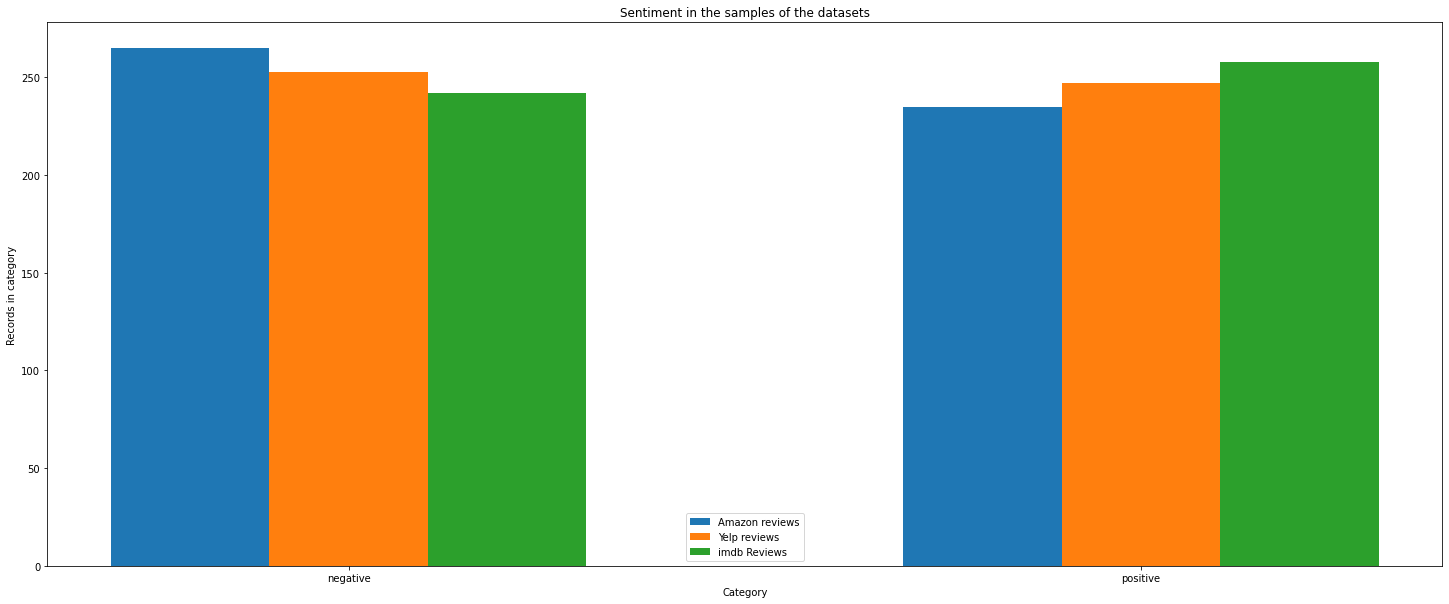

In [577]:
# bar plot for the sentiment in the samples
width = 0.2
plt.figure(figsize=(25,10))

# bar plots for the amount of scores of the datasets
plt.bar(amazon_sample_count.index, amazon_sample_count, width)
plt.bar(yelp_sample_count.index + width, yelp_sample_count, width)
plt.bar(imdb_sample_count.index + 2*width, imdb_sample_count, width)

# this is to put the names of the indexes in the plot
plt.xticks(yelp_sample_count.index+width,['negative','positive'])

# just more customization of the plot
plt.xlabel("Category")
plt.ylabel("Records in category")
plt.title("Sentiment in the samples of the datasets")
plt.legend(['Amazon reviews','Yelp reviews', 'imdb Reviews'])

plt.show()

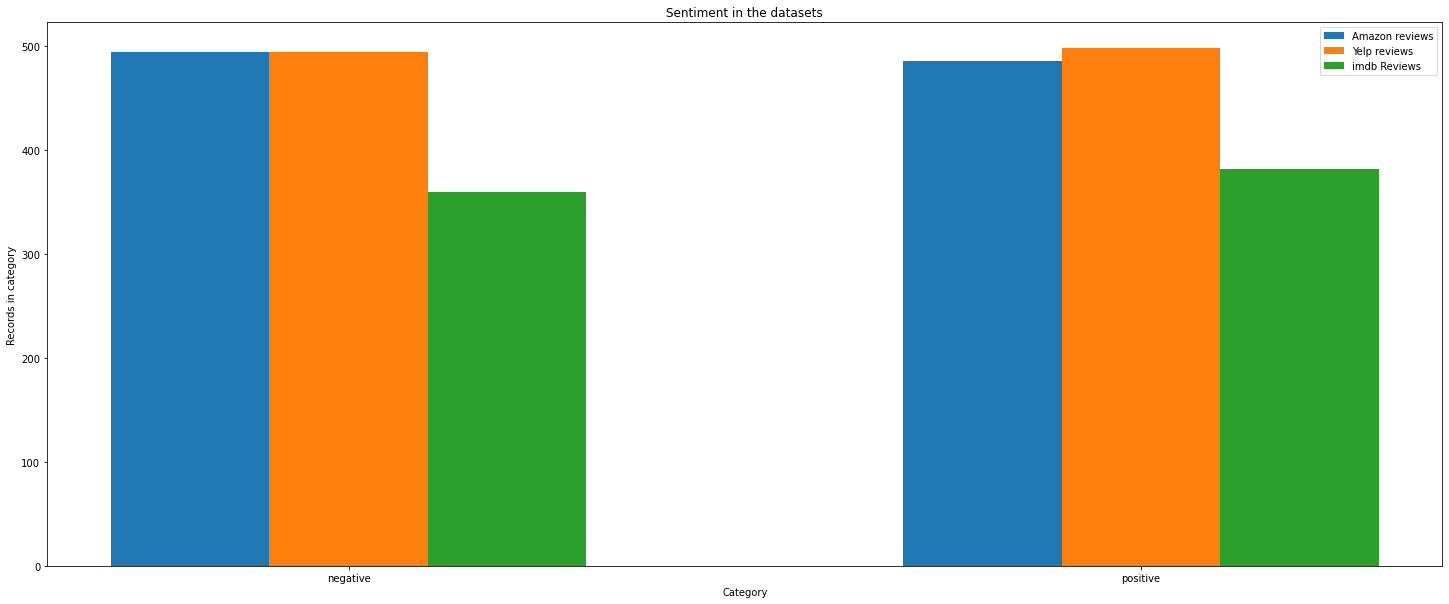

In [578]:
# bar plot for the sentiment in the whole datasets

width = 0.2
plt.figure(figsize=(25,10))

# bar plots for the amount of scores of the datasets
plt.bar(amazon_count.index, amazon_count, width)
plt.bar(yelp_count.index + width, yelp_count, width)
plt.bar(imdb_count.index + 2*width, imdb_count, width)



# this is to put the names of the indexes in the plot
plt.xticks(yelp_sample_count.index+width,['negative','positive'])

# just more customization of the plot
plt.xlabel("Category")
plt.ylabel("Records in category")
plt.title("Sentiment in the datasets")
plt.legend(['Amazon reviews','Yelp reviews', 'imdb Reviews'])

plt.show()

In [579]:
# if we compare both bar plots it seems the representation in the sample of the imdb data is not
# quite good compared with the other two datasets

In [516]:
# 3.2) Feature Creation

In [517]:
# getting the individual words in the datasets
amazon_df['unigrams'] = amazon_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
yelp_df['unigrams'] = yelp_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
imdb_df['unigrams'] = imdb_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [518]:
amazon_df.head(3)

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"


In [519]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  992 non-null    object
 1   score     992 non-null    int64 
 2   unigrams  992 non-null    object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [520]:
imdb_df.loc[0:3,'unigrams']

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [521]:
# 3.3) Feature subset selection

In [522]:
# creating the document term matrices
count_vect = CountVectorizer()
amazon_vector = count_vect.fit_transform(amazon_df.sentence)
#yelp_vector = count_vect.fit_transform(yelp_df.sentence)
#imdb_vector = count_vect.fit_transform(imdb_df.sentence)
print(amazon_vector[0])

  (0, 1489)	1
  (0, 1607)	1
  (0, 853)	1
  (0, 1073)	1
  (0, 1764)	1
  (0, 652)	1
  (0, 992)	1
  (0, 1638)	1
  (0, 1210)	1
  (0, 856)	1
  (0, 813)	2
  (0, 761)	1
  (0, 1602)	1
  (0, 1712)	1
  (0, 1700)	1
  (0, 710)	1
  (0, 232)	1
  (0, 366)	1


In [523]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(amazon_df.index)[0:100]]
plot_z = amazon_vector[0:100, 0:100].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

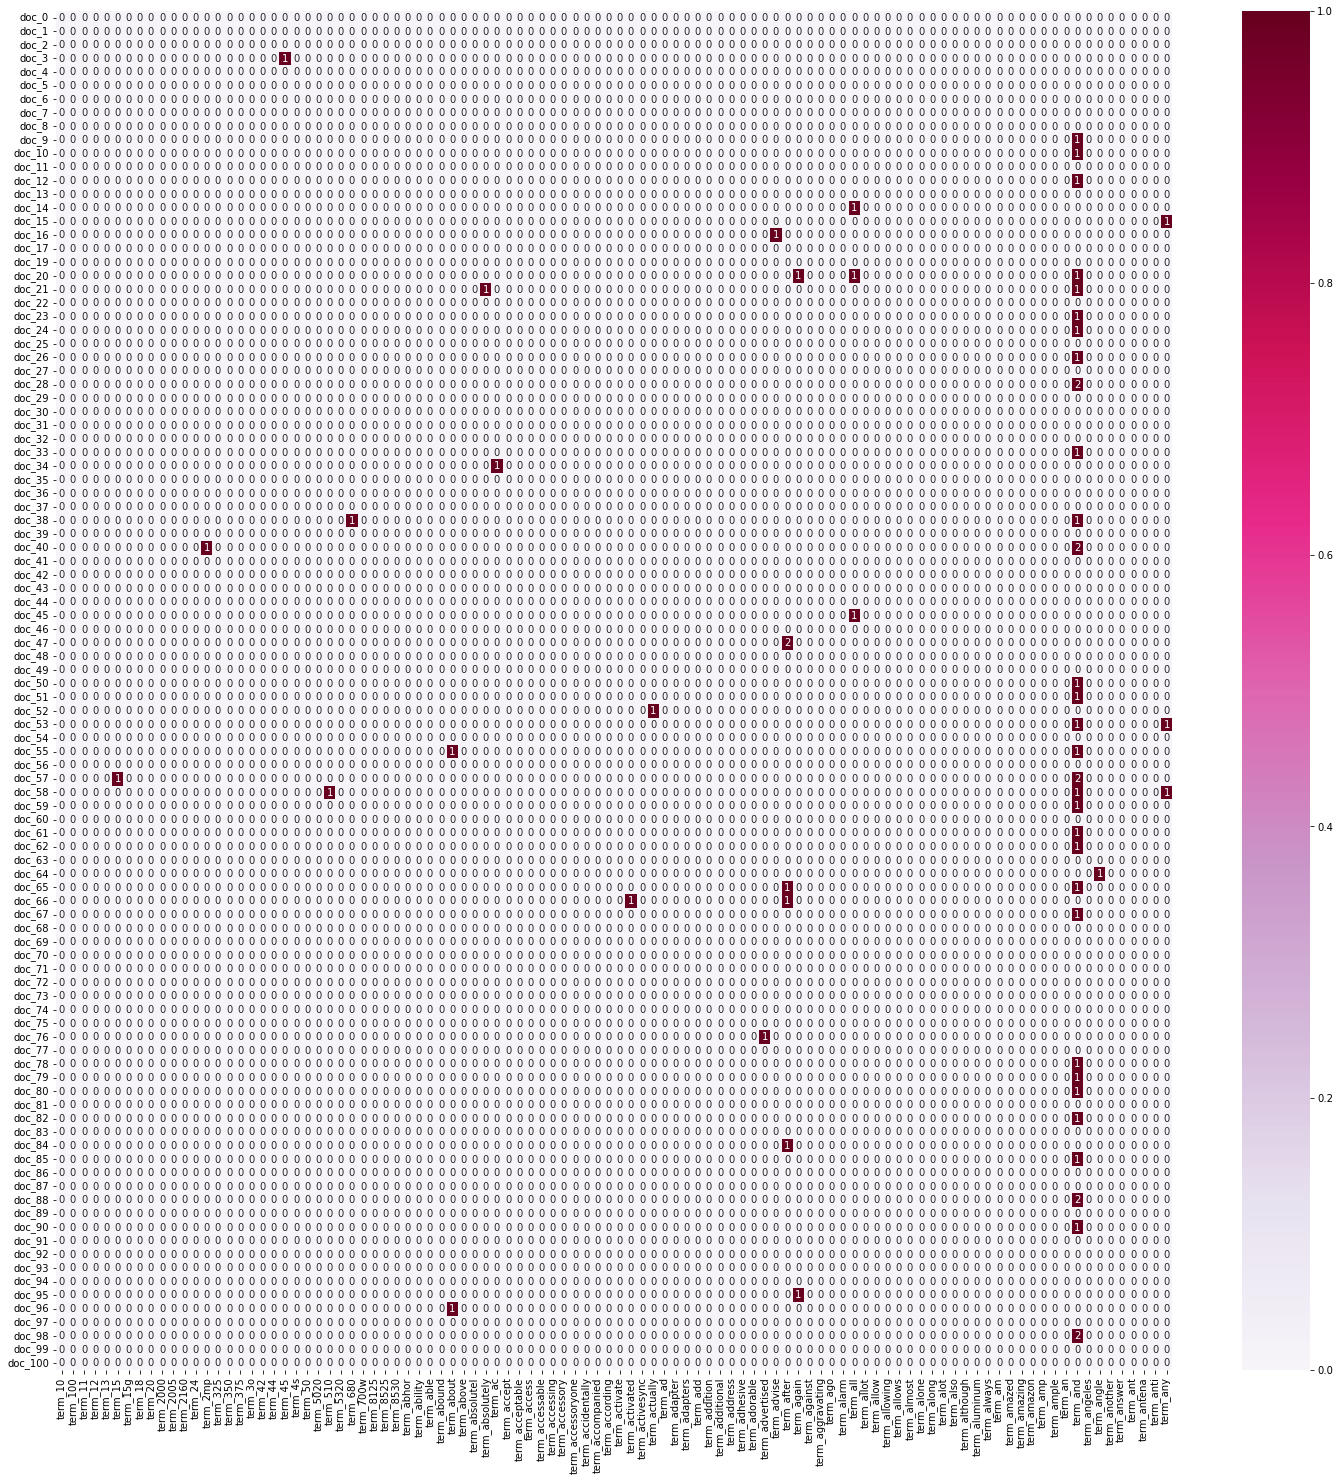

In [524]:
# plotting the heatmap for the amazon data
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [525]:
# 3.4) Dimensionality Reduction

In [526]:
amazon_reduced = PCA(n_components = 2).fit_transform(amazon_vector.toarray())

In [527]:
amazon_reduced.shape

(980, 2)

In [528]:
score=[0,1]

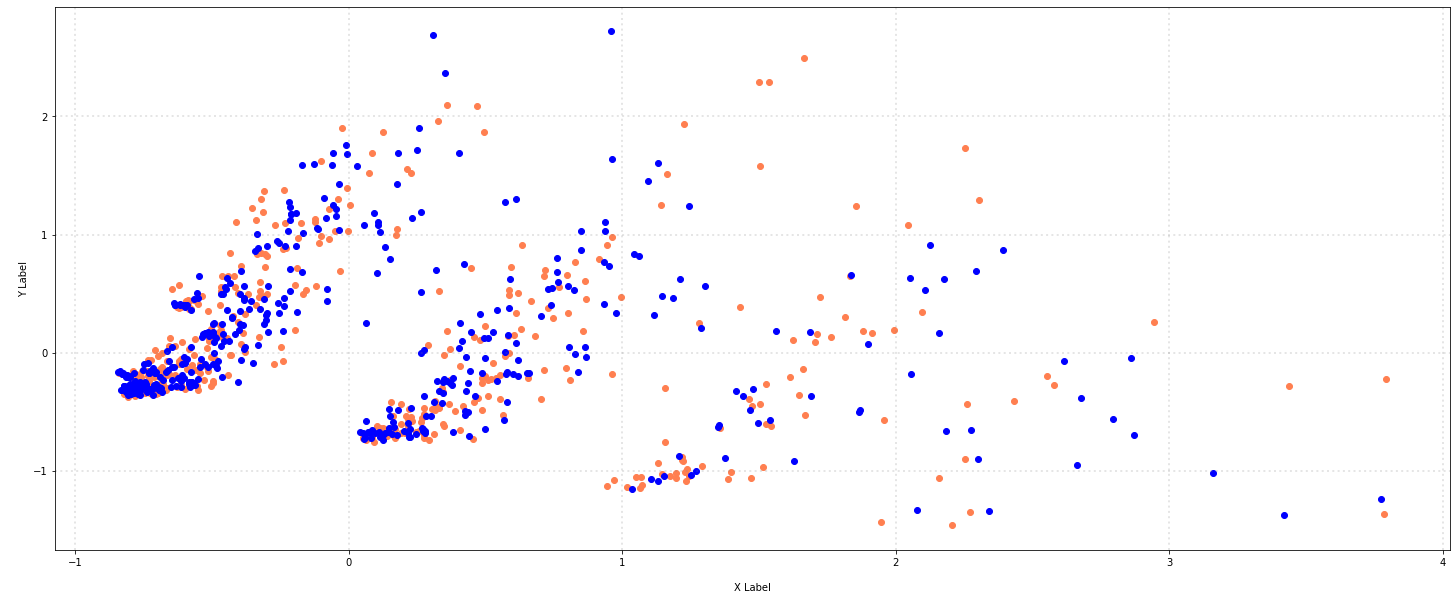

In [529]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, score):
    xs = amazon_reduced[amazon_df['score'] == score].T[0]
    ys = amazon_reduced[amazon_df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [530]:
# 3.5) Attribute transformation

In [531]:
term_frequencies = []
for j in range(0,amazon_vector.shape[1]):
    term_frequencies.append(sum(amazon_vector[:,j].toarray()))

In [532]:
term_frequencies = np.asarray(amazon_vector.sum(axis=0))[0]

In [533]:
count_vect.get_feature_names_out()[0:10]
term_frequencies[0]

4

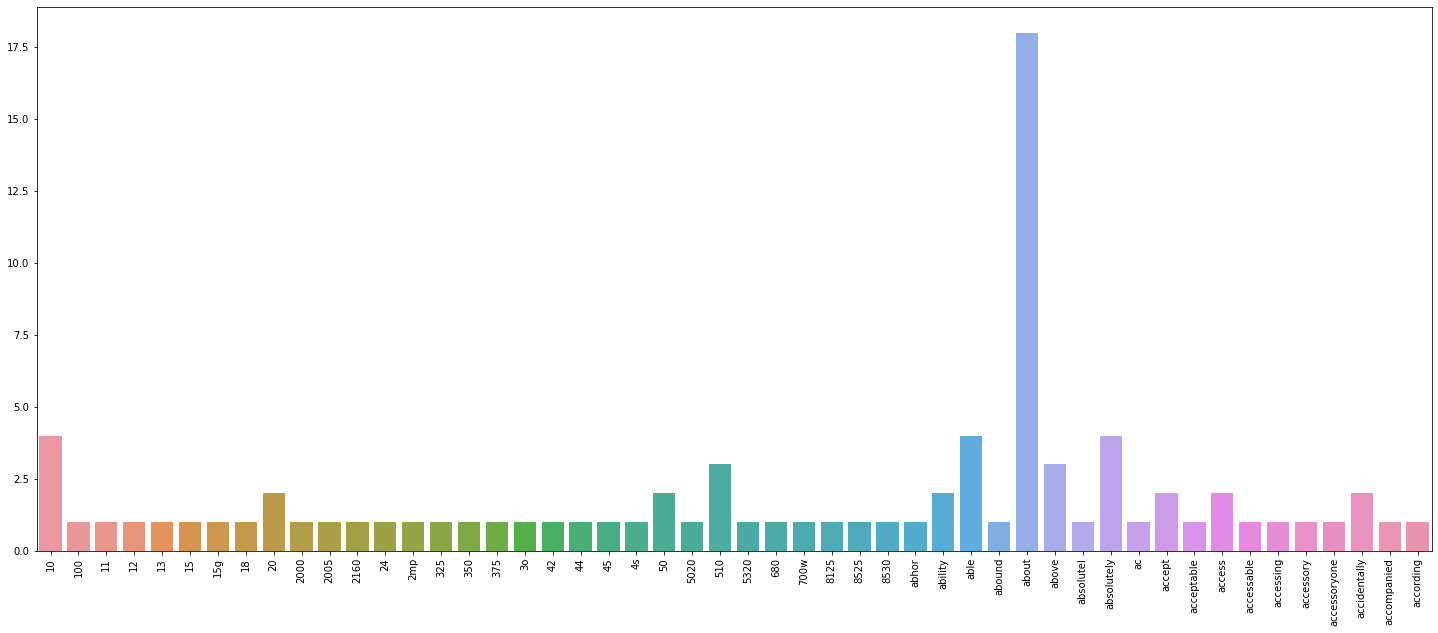

In [534]:
plt.subplots(figsize=(25, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90);

In [535]:
# plot with plotly
fig = px.bar(x=count_vect.get_feature_names_out()[0:50],y=term_frequencies[0:50])
fig.show()

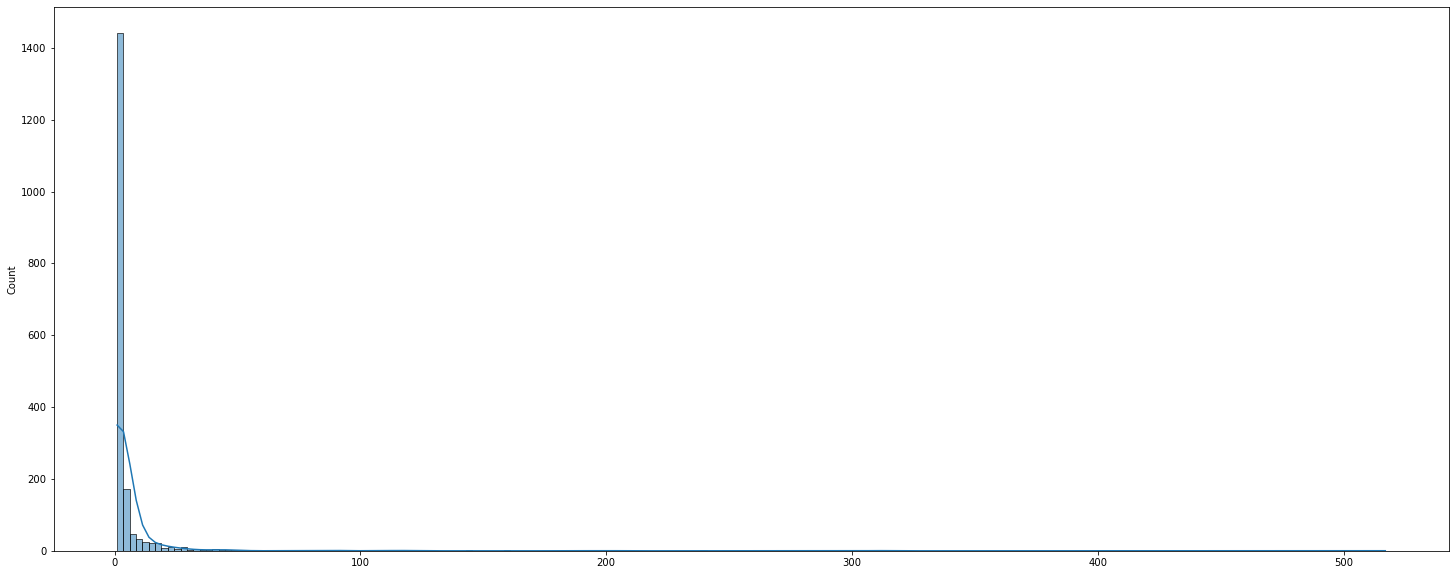

In [536]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=term_frequencies, kde=True, bins=200)
plt.show()

## PART 3: Attempt the following tasks

### 1) Generate meaningful new data visualizations. 
Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [ ]:
# for this part I decided to plot some graphs in the second and third section of the lab
# the reason is to not lose sequence of what I-m trying to do and get confused with that plot
# in summary the plots will be around the second and third part of the notebook

### 2) Generate TF-IDF features from the tokens of each text. 
This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide.

In [540]:
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
# https://www.kdnuggets.com/2018/08/wtf-tf-idf.html
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [541]:
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

In [542]:
amazon_count_transform = count_vect.fit_transform(amazon_df['sentence'])
amazon_tfidf_transform = tfidf_vect.fit_transform(amazon_df['sentence'])

In [543]:
print("Count vectorizer:\n", amazon_count_transform[0],"\n")
print("TD-IDF Vectorizer:\n",amazon_tfidf_transform[0],"\n")

Count vectorizer:
   (0, 1489)	1
  (0, 1607)	1
  (0, 853)	1
  (0, 1073)	1
  (0, 1764)	1
  (0, 652)	1
  (0, 992)	1
  (0, 1638)	1
  (0, 1210)	1
  (0, 856)	1
  (0, 813)	2
  (0, 761)	1
  (0, 1602)	1
  (0, 1712)	1
  (0, 1700)	1
  (0, 710)	1
  (0, 232)	1
  (0, 366)	1 

TD-IDF Vectorizer:
   (0, 366)	0.32988408987411494
  (0, 232)	0.2609276093470387
  (0, 710)	0.2724494622231399
  (0, 1700)	0.298105811601252
  (0, 1712)	0.3112949887470082
  (0, 1602)	0.09030260323141764
  (0, 761)	0.2878754910180688
  (0, 813)	0.31489347703392695
  (0, 856)	0.10690200352068094
  (0, 1210)	0.24773843220128242
  (0, 1638)	0.1270209584562051
  (0, 992)	0.20728409623953437
  (0, 652)	0.14616243210220933
  (0, 1764)	0.2663275333283891
  (0, 1073)	0.21408861388915978
  (0, 853)	0.11717659872292288
  (0, 1607)	0.22914933107417576
  (0, 1489)	0.19140858968288985 



In [544]:
count_tokens = count_vect.get_feature_names_out()
tfidf_tokens = tfidf_vect.get_feature_names_out()
print(count_tokens[0:10])
print(tfidf_tokens[0:10])

['10' '100' '11' '12' '13' '15' '15g' '18' '20' '2000']
['10' '100' '11' '12' '13' '15' '15g' '18' '20' '2000']


In [545]:
# using count vectorizer
amazon_count_transform.toarray()[0:4,0:50]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [546]:
# the 1 in the 4 record corresponds to the term 45
# so count vectorizer gives frequency of words
count_vect.get_feature_names_out()[20]

'45'

In [547]:
# using Tfidf Vectorizer
amazon_tfidf_transform.toarray()[0:4,0:50]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [548]:
# the 0.35795911 in the 4 record corresponds to the term 45
# so tfidf vectorizer gives weights of words compared with the overall words in the document
tfidf_vect.get_feature_names_out()[20]

'45'

In [549]:
df_countvect = pd.DataFrame(data = amazon_count_transform.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = amazon_tfidf_transform.toarray(),columns = tfidf_tokens)

In [550]:
df_countvect.head(3)

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [551]:
df_tfidfvect['45']

0      0.000000
1      0.000000
2      0.000000
3      0.357959
4      0.000000
         ...   
975    0.000000
976    0.000000
977    0.000000
978    0.000000
979    0.000000
Name: 45, Length: 980, dtype: float64

In [552]:
print("Count Vectorizer\n")
print(df_countvect['45'][0:10])
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect['45'][0:10])

Count Vectorizer

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: 45, dtype: int64

TD-IDF Vectorizer

0    0.000000
1    0.000000
2    0.000000
3    0.357959
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: 45, dtype: float64


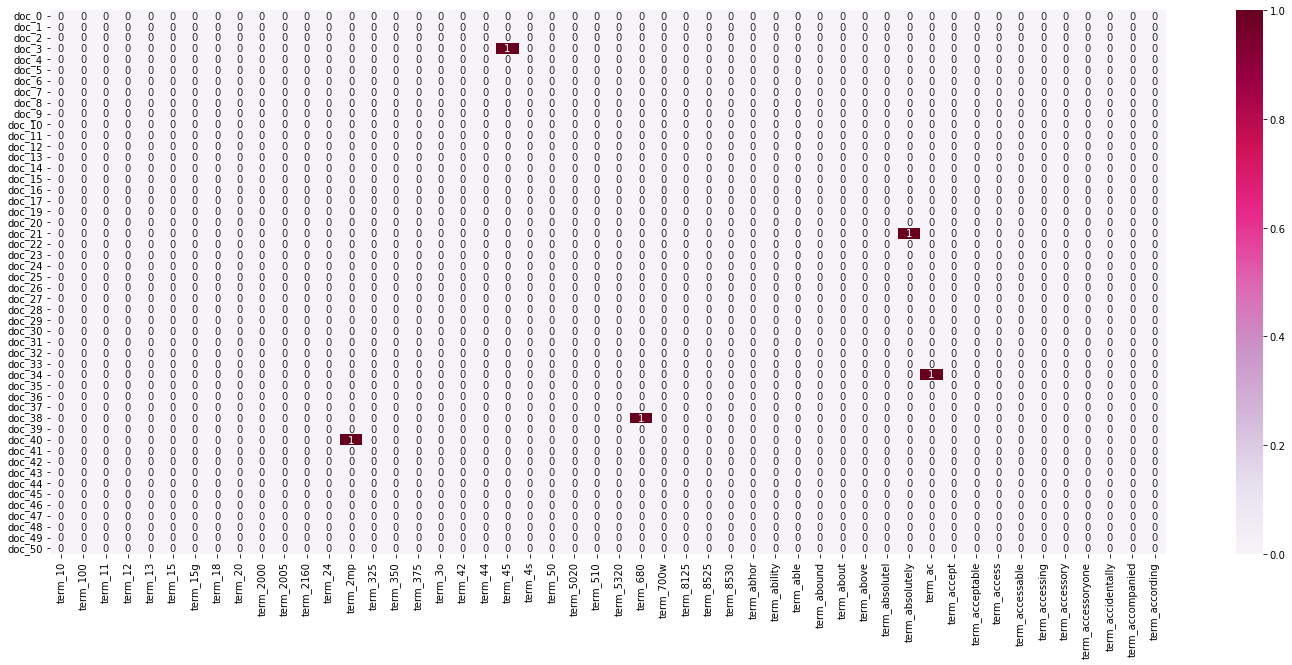

In [553]:
# doing the heatmap for the count vectorizer

plot_x = ["term_"+str(i) for i in count_tokens[0:50]]
plot_y = ["doc_"+ str(i) for i in list(amazon_df.index)[0:50]]
plot_z = amazon_count_transform[0:50, 0:50].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

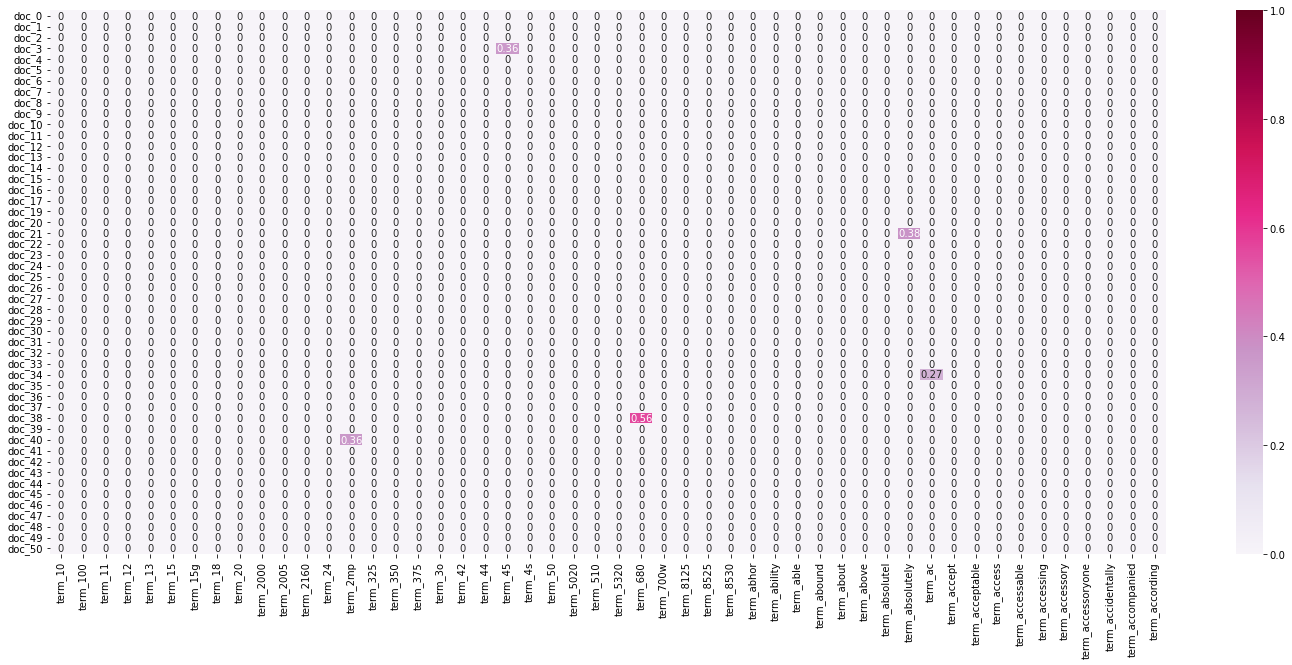

In [554]:
# doing the heatmap for the Tfidf Vectorizer

plot_x = ["term_"+str(i) for i in tfidf_tokens[0:50]]
plot_y = ["doc_"+ str(i) for i in list(amazon_df.index)[0:50]]
plot_z = amazon_tfidf_transform[0:50, 0:50].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 3)Implement a simple Naive Bayes classifier.
that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [555]:
# obtaining the data already in pandas dataframes
#amazon_df = pd.read_csv("new_data/amazon_cells_labelled.txt", sep="\t", header=None, names=["sentence", "score"])
#yelp_df=pd.read_table("new_data/yelp_labelled.txt", delimiter = '\t', header=None, names=["sentence", "score"])
#imdb_df=pd.read_table("new_data/imdb_labelled.txt", delimiter = '\t', header=None, names=["sentence", "score"])

In [556]:
# references used:
# https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/
# https://iq.opengenus.org/naive-bayes-on-tf-idf-vectorized-matrix/
# https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [557]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(amazon_df['sentence'], amazon_df['score'], test_size = 0.25, random_state = 0)

In [558]:
print(X_train.shape)
print(X_test.shape)

(735,)
(245,)


In [559]:
# Transforming train data with count vectorizer 
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(X_train)

In [560]:
# Transforming test data with count vectorizer
# for the test data fit.transform is not used because we want to extract the unique values only for the training data
X_test_count = count_vect.transform(X_test)

In [561]:
# building naive bayes model with Multinomial distribution
mm = MultinomialNB()
mm.fit(X_train_count, y_train)

MultinomialNB()

In [562]:
t=time()

# predict the new document from the testing dataset with the model
y_pred1 = mm.predict(X_test_count)

# compute the performance
score1 = metrics.accuracy_score(y_test, y_pred1)
print("accuracy:   %0.3f" % score1)


test_time = time() - t
print("test time:  %0.3fs" % test_time)



accuracy:   0.820
test time:  0.002s


In [563]:
y_pred1

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [564]:
# Print the Confusion Matrix for the model with Multinomial distribution

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm1)
print('\nTP=',cm1[0,0])
print('\nTN=',cm1[1,1])
print('\nFP=',cm1[0,1])
print('\nFN=',cm1[1,0])

Confusion matrix

 [[102  31]
 [ 13  99]]

TP= 102

TN= 99

FP= 31

FN= 13


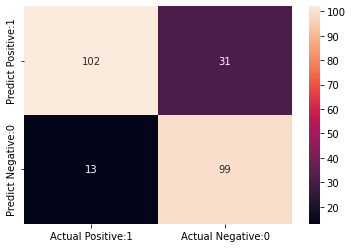

In [565]:
# visualize confusion matrix with seaborn heatmap

cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix1, annot=True, fmt='d')
plt.show()

In [566]:
# building naive bayes model with Gaussian distribution
# this time transforming the data with TF-IDF vectorizer

# Transforming train data with TF-IDF vectorizer
count_vect2 = TfidfVectorizer()
X_train_count2 = count_vect2.fit_transform(X_train)

# Transforming test data with TF-IDF vectorizer
X_test_count2 = count_vect2.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_count2.toarray(), y_train)

GaussianNB()

In [567]:
t=time()
# predict the new document from the testing dataset with the model
y_pred2 = gnb.predict(X_test_count2.toarray())

# compute the performance
score2 = metrics.accuracy_score(y_test, y_pred2)
print("accuracy:   %0.3f" % score2)

test_time2 = time() - t
print("test time:  %0.3fs" % test_time2)

accuracy:   0.710
test time:  0.011s


In [568]:
y_pred2

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [569]:
# Print the Confusion Matrix for the model with Gaussian distribution

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)

print('Confusion matrix\n\n', cm2)
print('\nTP=',cm2[0,0])
print('\nTN=',cm2[1,1])
print('\nFP=',cm2[0,1])
print('\nFN=',cm2[1,0])

Confusion matrix

 [[79 54]
 [17 95]]

TP= 79

TN= 95

FP= 54

FN= 17


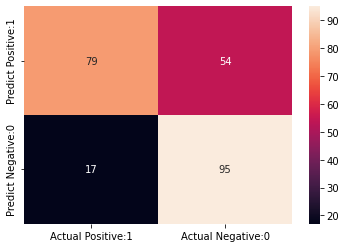

In [570]:
# visualize confusion matrix with seaborn heatmap

cm_matrix2 = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix2, annot=True, fmt='d')
plt.show()

In [571]:
# the accuracy with the gaussian was 0.696 using the TF-IDF vectorizer and the accuracy with the
# multinomial was 0.787 using the count vectorizer, the multinomial was faster also. For this case
# the multinomial with count vectorizer was better.

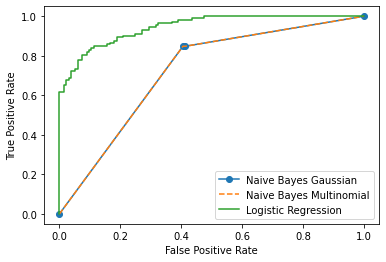

In [572]:
# ROC curves for the Naive Bayes Models and Comparison with Logistic Regression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Fitting the data with Logistic Regression
lr = LogisticRegression() 
lr.fit(X_train_count, y_train) 

# scores of the three models (Naive Bayes Multinomial (mm), Naive Bayes Gaussian (gnb) and Logistic Regression)
gnb_score = gnb.predict_proba(X_test_count2.toarray()) # X_test_count2 was transfrmed with TF-IDF vectorizer
mm_score = mm.predict_proba(X_test_count) # X_test_count was transformed with count vectorizer
lr_score = lr.decision_function(X_test_count2)

# ROC curves
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb_score[:, 1])
fpr_mm, tpr_mm, thresholds_mm = roc_curve(y_test, mm_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_score)

# Plot
plt.plot(fpr_gnb,tpr_gnb, marker='o', label='Naive Bayes Gaussian')
plt.plot(fpr_gnb,tpr_gnb, linestyle='--', label='Naive Bayes Multinomial')
plt.plot(fpr_lr,tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [573]:
# due to the plot i decided to compute the accuracy of the logistic regression and for this data
# it seems the logistic model is slightly better than naive bayes and is more better using the
# TF-IDF vectorizer

In [574]:
t=time()
# predict the new document from the testing dataset with the logistic model count vectorizer
y_pred3 = lr.predict(X_test_count)

# compute the performance
score3 = metrics.accuracy_score(y_test, y_pred3)
print("accuracy:   %0.3f" % score3)

test_time3 = time() - t
print("test time:  %0.3fs" % test_time3)

accuracy:   0.833
test time:  0.001s


In [575]:
t=time()
# predict the new document from the testing dataset with the logistic model  TF-IDF vectorizer
y_pred3 = lr.predict(X_test_count2)

# compute the performance
score3 = metrics.accuracy_score(y_test, y_pred3)
print("accuracy:   %0.3f" % score3)

test_time3 = time() - t
print("test time:  %0.3fs" % test_time3)

accuracy:   0.865
test time:  0.001s


In [576]:
cm3 = confusion_matrix(y_test, y_pred3)

print('Confusion matrix\n\n', cm3)
print('\nTP=',cm3[0,0])
print('\nTN=',cm3[1,1])
print('\nFP=',cm3[0,1])
print('\nFN=',cm3[1,0])

Confusion matrix

 [[118  15]
 [ 18  94]]

TP= 118

TN= 94

FP= 15

FN= 18


In [612]:
# plotting a barplot comparing the different predicted sentiments for the reviews using the different models
print(pd.DataFrame(y_pred1).value_counts())
print(pd.DataFrame(y_pred2).value_counts())
print(pd.DataFrame(y_pred3).value_counts())

1    130
0    115
dtype: int64
1    149
0     96
dtype: int64
0    136
1    109
dtype: int64


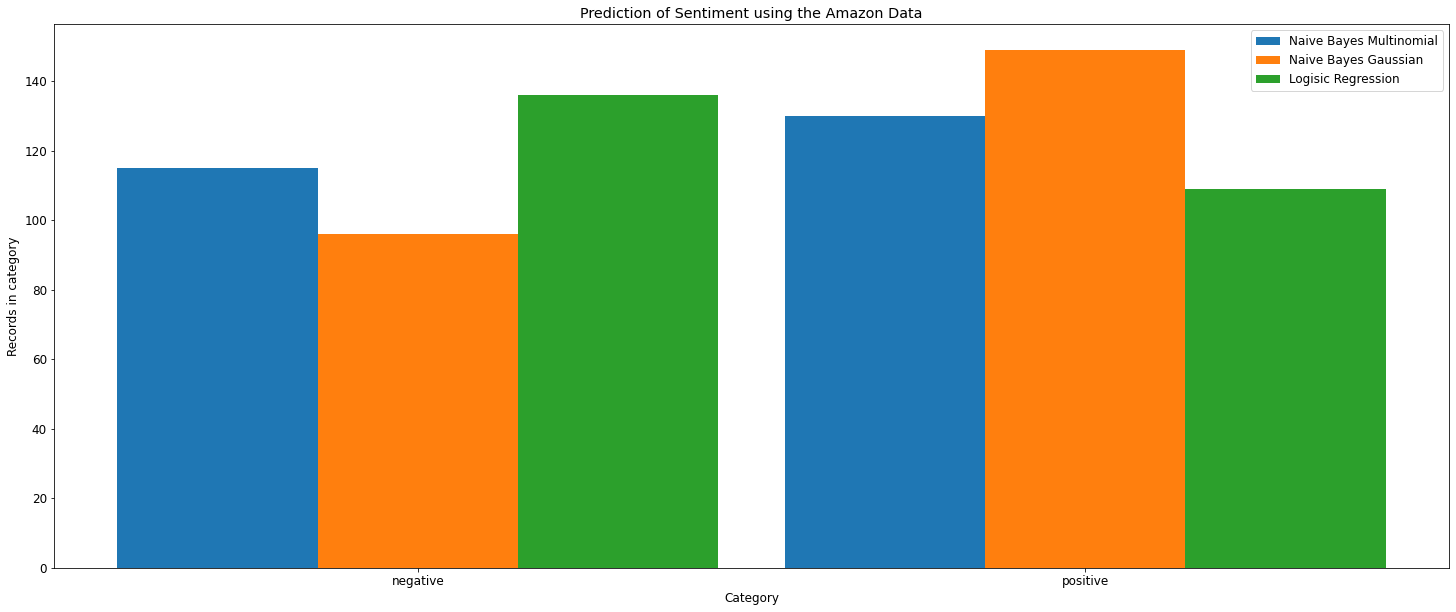

In [626]:
width = 0.3
plt.figure(figsize=(25,10))

# bar plots for the amount of values of the datasets
plt.bar(np.array([1,0]), pd.DataFrame(y_pred1).value_counts(), width)
plt.bar(np.array([1,0]) + width, pd.DataFrame(y_pred2).value_counts(), width)
plt.bar(np.array([0,1]) + 2*width, pd.DataFrame(y_pred3).value_counts(), width)

# this is to put the names of the indexes in the plot
plt.xticks(yelp_sample_count.index+width,['negative','positive'])

# just more customization of the plot
plt.xlabel("Category")
plt.ylabel("Records in category")
plt.title("Prediction of Sentiment using the Amazon Data")
plt.legend(['Naive Bayes Multinomial','Naive Bayes Gaussian','Logisic Regression'])

plt.show()

## PART 4
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

#### In the lab
* I liked the lab a lot so I'm not sure what feedback to present. Maybe from my vantage point as a newbie: In the lab I got confused in the feature subset selection because I think is kind of difficult to visualize the information we get from the transformation of the vectorizer with the actual image we have from the class of what is a document term matrix However I did understood it by reading an example with a very small array and then I could understand better when comparing with the one in the lab. In summary I think doing the explanation of the feature subset selection with a big array of data is kind of overwhelming if we are newbies. However I do understand that time is limited therefore we have to research for ourselves also.

#### In the Homework
* For the new dataset I think after downloading them we can separate them before, one .csv for the training data and another for the test because maybe by mistake we can combine the data or the sample is not representative enough.
* I think that data gathered in the real world wont be so tidy as the one we used in the lab and homework hence we have to get used to read the documentations/tutorials using different tools that pandas/numpy and the other libraries have